# BIRDS 450 SPECIES- IMAGE CLASSIFICATION

450 species, 76,262 train, 2250 test, 2250 validation images 224X224X3 jpg

In [1]:
!pip install jovian --upgrade --quiet
!pip install opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 6.6 MB/s 


In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="birds-450-species-image-classification")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Preprocessing Steps

1. Pick a dataset
2. Download the dataset
3. Import the dataset using Tensorflow
4. Explore the dataset
5. Prepare the dataset for training

#### Import relevant Libraries

In [4]:
import numpy as np
import os
import opendatasets as od
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [5]:
print(tf.__version__)

2.9.2


In [6]:
dateseturl = 'https://www.kaggle.com/datasets/gpiosenka/100-bird-species?select=images+to+test'

In [7]:
od.download(dateseturl)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohitkmr95
Your Kaggle Key: ··········


100%|██████████| 1.69G/1.69G [01:55<00:00, 15.7MB/s]


In [8]:
data_dir = '/content/100-bird-species/train'

In [9]:
# Classes details
os.listdir(data_dir)

['DALMATIAN PELICAN',
 'AMERICAN FLAMINGO',
 'GROVED BILLED ANI',
 'TEAL DUCK',
 'HORNED LARK',
 'TRICOLORED BLACKBIRD',
 'ALTAMIRA YELLOWTHROAT',
 'GOLDEN PARAKEET',
 'ANDEAN GOOSE',
 'PURPLE MARTIN',
 'ABYSSINIAN GROUND HORNBILL',
 'ANHINGA',
 'ANDEAN LAPWING',
 'BEARDED REEDLING',
 'BLACK COCKATO',
 'EASTERN TOWEE',
 'BROWN THRASHER',
 'CERULEAN WARBLER',
 'NORTHERN JACANA',
 'AFRICAN PIED HORNBILL',
 'CAPPED HERON',
 'VIOLET GREEN SWALLOW',
 'RUFOUS KINGFISHER',
 'ORIENTAL BAY OWL',
 'RED FACED WARBLER',
 'IVORY GULL',
 'CUBAN TODY',
 'IMPERIAL SHAQ',
 'ROYAL FLYCATCHER',
 'LONG-EARED OWL',
 'CANARY',
 'FIRE TAILLED MYZORNIS',
 'VIOLET TURACO',
 'SRI LANKA BLUE MAGPIE',
 'PURPLE FINCH',
 'CINNAMON ATTILA',
 'DOUBLE EYED FIG PARROT',
 'INDIAN PITTA',
 'VARIED THRUSH',
 'GURNEYS PITTA',
 'HYACINTH MACAW',
 'BRANDT CORMARANT',
 'NORTHERN FULMAR',
 'AVADAVAT',
 'TRUMPTER SWAN',
 'RED BROWED FINCH',
 'GOULDIAN FINCH',
 'VERMILION FLYCATHER',
 'BIRD OF PARADISE',
 'AUCKLAND SHAQ',
 'QUET

In [10]:
# No of images per class

for cls in os.listdir(data_dir):
    print(cls, ':', len(os.listdir(data_dir + '/' + cls)))

DALMATIAN PELICAN : 159
AMERICAN FLAMINGO : 164
GROVED BILLED ANI : 155
TEAL DUCK : 159
HORNED LARK : 173
TRICOLORED BLACKBIRD : 143
ALTAMIRA YELLOWTHROAT : 150
GOLDEN PARAKEET : 150
ANDEAN GOOSE : 134
PURPLE MARTIN : 160
ABYSSINIAN GROUND HORNBILL : 179
ANHINGA : 154
ANDEAN LAPWING : 144
BEARDED REEDLING : 144
BLACK COCKATO : 133
EASTERN TOWEE : 157
BROWN THRASHER : 165
CERULEAN WARBLER : 163
NORTHERN JACANA : 156
AFRICAN PIED HORNBILL : 187
CAPPED HERON : 137
VIOLET GREEN SWALLOW : 201
RUFOUS KINGFISHER : 156
ORIENTAL BAY OWL : 157
RED FACED WARBLER : 167
IVORY GULL : 156
CUBAN TODY : 162
IMPERIAL SHAQ : 144
ROYAL FLYCATCHER : 142
LONG-EARED OWL : 160
CANARY : 160
FIRE TAILLED MYZORNIS : 150
VIOLET TURACO : 162
SRI LANKA BLUE MAGPIE : 161
PURPLE FINCH : 153
CINNAMON ATTILA : 164
DOUBLE EYED FIG PARROT : 166
INDIAN PITTA : 186
VARIED THRUSH : 193
GURNEYS PITTA : 163
HYACINTH MACAW : 165
BRANDT CORMARANT : 154
NORTHERN FULMAR : 137
AVADAVAT : 164
TRUMPTER SWAN : 137
RED BROWED FINCH : 

In [11]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [12]:
cls = ['INDIAN VULTURE',
 'AUSTRAL CANASTERO',
 'GOLDEN PIPIT',
 'ALEXANDRINE PARAKEET',
 'CANARY',
 'ANDEAN LAPWING',
 'BLUE MALKOHA',
 'PINK ROBIN',
 'EASTERN GOLDEN WEAVER',
 'JAPANESE ROBIN',
 'SAND MARTIN',
 'DOUBLE BARRED FINCH',
 'KAGU',
 'GILA WOODPECKER',
 'KAKAPO',
 'STORK BILLED KINGFISHER',
 'ABYSSINIAN GROUND HORNBILL',
 'VENEZUELIAN TROUPIAL',
 'HOUSE FINCH',
 'GUINEAFOWL',
 'GREY CUCKOOSHRIKE',
 'VICTORIA CROWNED PIGEON',
 'NORTHERN CARDINAL',
 'MANDRIN DUCK',
 'RED BELLIED PITTA',
 'ORANGE BRESTED BUNTING',
 'EASTERN ROSELLA',
 'CASPIAN TERN',
 'PEACOCK',
 'WATTLED LAPWING',
 'STRIPPED SWALLOW',
 'BANDED BROADBILL',
 'NOISY FRIARBIRD',
 'COPPERY TAILED COUCAL',
 'BROWN THRASHER',
 'YELLOW HEADED BLACKBIRD',
 'CROWNED PIGEON',
 'LARK BUNTING',
 'HORNED SUNGEM',
 'RAINBOW LORIKEET',
 'GOLD WING WARBLER',
 'EURASIAN MAGPIE',
 'CAPPED HERON',
 'BLACK-THROATED SPARROW',
 'NORTHERN GANNET',
 'BROWN NOODY',
 'SPOONBILL',
 'PUFFIN',
 'AFRICAN OYSTER CATCHER',
 'SAMATRAN THRUSH',
 'DARK EYED JUNCO',
 'BLUE HERON',
 'ROBIN',
 'AZURE BREASTED PITTA',
 'GREATER PEWEE',
 'RED TAILED THRUSH',
 'AMETHYST WOODSTAR',
 'CRESTED AUKLET',
 'CUBAN TODY',
 'NORTHERN SHOVELER',
 'FLAME BOWERBIRD',
 'DARWINS FLYCATCHER',
 'OSPREY',
 'EARED PITA',
 'REGENT BOWERBIRD',
 'AMERICAN PIPIT',
 'BARN OWL',
 'BLACK BAZA',
 'MASKED LAPWING',
 'INLAND DOTTEREL',
 'HAMERKOP',
 'SPOTTED CATBIRD',
 'EASTERN WIP POOR WILL',
 'RED BROWED FINCH',
 'INCA TERN',
 'ANTILLEAN EUPHONIA',
 'MALAGASY WHITE EYE',
 'QUETZAL',
 'BORNEAN BRISTLEHEAD',
 'HOODED MERGANSER',
 'RED FACED WARBLER',
 'BLACK TAIL CRAKE',
 'IWI',
 'DOUBLE EYED FIG PARROT',
 'COMMON GRACKLE',
 'IVORY BILLED ARACARI',
 'SPLENDID WREN',
 'PARAKETT  AKULET',
 'ECUADORIAN HILLSTAR',
 'STEAMER DUCK',
 'AZARAS SPINETAIL',
 'EURASIAN BULLFINCH',
 'CRESTED COUA',
 'GURNEYS PITTA',
 'MANGROVE CUCKOO',
 'INDIAN PITTA',
 'ASIAN CRESTED IBIS',
 'FIORDLAND PENGUIN',
 'RING-NECKED PHEASANT',
 'AMERICAN REDSTART',
 'AZURE TIT',
 'MASKED BOOBY',
 'CAPE GLOSSY STARLING',
 'WHITE CHEEKED TURACO',
 'ABBOTTS BABBLER',
 'IVORY GULL',
 'AMERICAN BITTERN',
 'BLUE GROUSE',
 'EUROPEAN TURTLE DOVE',
 'ANNAS HUMMINGBIRD',
 'JACK SNIPE',
 'LONG-EARED OWL',
 'WATTLED CURASSOW',
 'HOATZIN',
 'GOLDEN CHEEKED WARBLER',
 'TROPICAL KINGBIRD',
 'DUSKY LORY',
 'AMERICAN WIGEON',
 'SCARLET TANAGER',
 'VIOLET TURACO',
 'FAIRY TERN',
 'SNOWY OWL',
 'GREAT JACAMAR',
 'CAPUCHINBIRD',
 'GREAT POTOO',
 'ROSY FACED LOVEBIRD',
 'BURCHELLS COURSER',
 'FIRE TAILLED MYZORNIS',
 'ROYAL FLYCATCHER',
 'EMU',
 'CAPE LONGCLAW',
 'HIMALAYAN MONAL',
 'CALIFORNIA GULL',
 'ALTAMIRA YELLOWTHROAT',
 'BLACK-CAPPED CHICKADEE',
 'HARLEQUIN QUAIL',
 'GOLDEN PHEASANT',
 'CRAB PLOVER',
 'SWINHOES PHEASANT',
 'COMMON STARLING',
 'ELEGANT TROGON',
 'TURQUOISE MOTMOT',
 'ELLIOTS  PHEASANT',
 'JOCOTOCO ANTPITTA',
 'TRICOLORED BLACKBIRD',
 'UMBRELLA BIRD',
 'BUFFLEHEAD',
 'EMERALD TANAGER',
 'CURL CRESTED ARACURI',
 'CROW',
 'CALIFORNIA CONDOR',
 'AZURE TANAGER',
 'EASTERN BLUEBIRD',
 'BULWERS PHEASANT',
 'FLAME TANAGER',
 'BLUE THROATED TOUCANET',
 'KILLDEAR',
 'GREEN MAGPIE',
 'NORTHERN GOSHAWK',
 'MIKADO  PHEASANT',
 'DEMOISELLE CRANE',
 'EASTERN TOWEE',
 'PALILA',
 'INDIGO FLYCATCHER',
 'COMMON HOUSE MARTIN',
 'EMPEROR PENGUIN',
 'BLUE COAU',
 'HEPATIC TANAGER',
 'BORNEAN LEAFBIRD',
 'BORNEAN PHEASANT',
 'D-ARNAUDS BARBET',
 'EGYPTIAN GOOSE',
 'RED TAILED HAWK',
 'BROWN CREPPER',
 'ANHINGA',
 'CINNAMON ATTILA',
 'DOUBLE BRESTED CORMARANT',
 'SPANGLED COTINGA',
 'ANDEAN GOOSE',
 'SMITHS LONGSPUR',
 'PURPLE SWAMPHEN',
 'CHIPPING SPARROW',
 'GO AWAY BIRD',
 'BOBOLINK',
 'CARMINE BEE-EATER',
 'BUSH TURKEY',
 'MALACHITE KINGFISHER',
 'GREATOR SAGE GROUSE',
 'POMARINE JAEGER',
 'KOOKABURRA',
 'VIOLET GREEN SWALLOW',
 'PYGMY KINGFISHER',
 'GREAT GRAY OWL',
 'AUSTRALASIAN FIGBIRD',
 'BANDED PITA',
 'CRIMSON SUNBIRD',
 'PAINTED BUNTING',
 'CASSOWARY',
 'OCELLATED TURKEY',
 'ORIENTAL BAY OWL',
 'CALIFORNIA QUAIL',
 'COMMON POORWILL',
 'EASTERN MEADOWLARK',
 'ENGGANO MYNA',
 'FAIRY PENGUIN',
 'AMERICAN KESTREL',
 'SNOWY EGRET',
 'WHIMBREL',
 'BLOOD PHEASANT',
 'HORNED GUAN',
 'AMERICAN GOLDFINCH',
 'OSTRICH',
 'DARJEELING WOODPECKER',
 'NORTHERN FULMAR',
 'CINNAMON TEAL',
 'STRIPED OWL',
 'BAND TAILED GUAN',
 'SNOWY PLOVER',
 'GREAT KISKADEE',
 'BLACK & YELLOW BROADBILL',
 'CREAM COLORED WOODPECKER',
 'BIRD OF PARADISE',
 'ANIANIAU',
 'TIT MOUSE',
 'RUDY KINGFISHER',
 'BEARDED BARBET',
 'BALTIMORE ORIOLE',
 'KING VULTURE',
 'APAPANE',
 'FAN TAILED WIDOW',
 'LAZULI BUNTING',
 'CHINESE BAMBOO PARTRIDGE',
 'ALBATROSS',
 'CERULEAN WARBLER',
 'ASHY STORM PETREL',
 'AFRICAN CROWNED CRANE',
 'CHESTNET BELLIED EUPHONIA',
 'GREEN JAY',
 'HAWAIIAN GOOSE',
 'RAZORBILL',
 'FAIRY BLUEBIRD',
 'RED WINGED BLACKBIRD',
 'WHITE CRESTED HORNBILL',
 'LOGGERHEAD SHRIKE',
 'LILAC ROLLER',
 'GLOSSY IBIS',
 'GOLDEN CHLOROPHONIA',
 'DALMATIAN PELICAN',
 'GREY PLOVER',
 'NORTHERN FLICKER',
 'ROADRUNNER',
 'AZURE JAY',
 'EURASIAN GOLDEN ORIOLE',
 'CAPE MAY WARBLER',
 'IBERIAN MAGPIE',
 'VARIED THRUSH',
 'GREEN BROADBILL',
 'CRESTED OROPENDOLA',
 'EUROPEAN GOLDFINCH',
 'BARROWS GOLDENEYE',
 'SCARLET MACAW',
 'MALABAR HORNBILL',
 'SANDHILL CRANE',
 'BLACK SWAN',
 'TOUCHAN',
 'CRESTED KINGFISHER',
 'GOLDEN PARAKEET',
 'CUBAN TROGON',
 'PURPLE GALLINULE',
 'WHITE TAILED TROPIC',
 'PEREGRINE FALCON',
 'EVENING GROSBEAK',
 'CEDAR WAXWING',
 'HORNED LARK',
 'TAILORBIRD',
 'BEARDED BELLBIRD',
 'BALD IBIS',
 'RUBY THROATED HUMMINGBIRD',
 'MAGPIE GOOSE',
 'GILDED FLICKER',
 'CRANE HAWK',
 'INDIAN ROLLER',
 'WHITE THROATED BEE EATER',
 'WALL CREAPER',
 'GOULDIAN FINCH',
 'DAURIAN REDSTART',
 'BLACK VENTED SHEARWATER',
 'LITTLE AUK',
 'BLACK THROATED WARBLER',
 'ASIAN DOLLARD BIRD',
 'NORTHERN BEARDLESS TYRANNULET',
 'TURKEY VULTURE',
 'BLUE DACNIS',
 'KIWI',
 'SORA',
 'TREE SWALLOW',
 'BLACK VULTURE',
 'BLACK THROATED BUSHTIT',
 'MCKAYS BUNTING',
 'GAMBELS QUAIL',
 'SCARLET CROWNED FRUIT DOVE',
 'INDIGO BUNTING',
 'CRIMSON CHAT',
 'WOOD DUCK',
 'COMMON LOON',
 'PARUS MAJOR',
 'BAIKAL TEAL',
 'TAIWAN MAGPIE',
 'AFRICAN PIED HORNBILL',
 'COMMON IORA',
 'CAMPO FLICKER',
 'CHUKAR PARTRIDGE',
 'FIERY MINIVET',
 'BEARDED REEDLING',
 'RED BEARDED BEE EATER',
 'BLACK-NECKED GREBE',
 'CINNAMON FLYCATCHER',
 'DUSKY ROBIN',
 'AUCKLAND SHAQ',
 'SHORT BILLED DOWITCHER',
 'HOOPOES',
 'PATAGONIAN SIERRA FINCH',
 'BELTED KINGFISHER',
 'CRESTED SHRIKETIT',
 'IBISBILL',
 'BARN SWALLOW',
 'GOLDEN EAGLE',
 'CHUCAO TAPACULO',
 'IMPERIAL SHAQ',
 'PARADISE TANAGER',
 'CHATTERING LORY',
 'GRAY CATBIRD',
 'HELMET VANGA',
 'LESSER ADJUTANT',
 'SATYR TRAGOPAN',
 'BREWERS BLACKBIRD',
 'RED HEADED DUCK',
 'STRIPPED MANAKIN',
 'TRUMPTER SWAN',
 'HOUSE SPARROW',
 'NORTHERN JACANA',
 'GREAT TINAMOU',
 'EASTERN BLUEBONNET',
 'RUFUOS MOTMOT',
 'CACTUS WREN',
 'WHITE NECKED RAVEN',
 'BALI STARLING',
 'OYSTER CATCHER',
 'CLARKS NUTCRACKER',
 'TASMANIAN HEN',
 'JANDAYA PARAKEET',
 'CRESTED CARACARA',
 'CAATINGA CACHOLOTE',
 'WHITE BROWED CRAKE',
 'HAWFINCH',
 'AMERICAN FLAMINGO',
 'VEERY',
 'SKUA',
 'BRANDT CORMARANT',
 'VULTURINE GUINEAFOWL',
 'BANDED STILT',
 'NORTHERN MOCKINGBIRD',
 'TOWNSENDS WARBLER',
 'SHOEBILL',
 'STRAWBERRY FINCH',
 'HYACINTH MACAW',
 'OVENBIRD',
 'OKINAWA RAIL',
 'MALEO',
 'PURPLE MARTIN',
 'SPOON BILED SANDPIPER',
 'AVADAVAT',
 'BLACK FRANCOLIN',
 'RED NAPED TROGON',
 'GYRFALCON',
 'ARARIPE MANAKIN',
 'RED HONEY CREEPER',
 'PURPLE FINCH',
 'SUPERB STARLING',
 'COCKATOO',
 'PHILIPPINE EAGLE',
 'CHINESE POND HERON',
 'RUFOUS KINGFISHER',
 'BANANAQUIT',
 'NORTHERN PARULA',
 'FRIGATE',
 'GREAT XENOPS',
 'ROCK DOVE',
 'HARLEQUIN DUCK',
 'HIMALAYAN BLUETAIL',
 'GANG GANG COCKATOO',
 'ANTBIRD',
 'TEAL DUCK',
 'WILSONS BIRD OF PARADISE',
 'AMERICAN COOT',
 'MOURNING DOVE',
 'BAY-BREASTED WARBLER',
 'BAR-TAILED GODWIT',
 'GROVED BILLED ANI',
 'VERMILION FLYCATHER',
 'RED FACED CORMORANT',
 'ALBERTS TOWHEE',
 'BLONDE CRESTED WOODPECKER',
 'ANDEAN SISKIN',
 'COCK OF THE  ROCK',
 'TAKAHE',
 'ASHY THRUSHBIRD',
 'AFRICAN FIREFINCH',
 'APOSTLEBIRD',
 'CHARA DE COLLAR',
 'RED WISKERED BULBUL',
 'MYNA',
 'MARABOU STORK',
 'BARRED PUFFBIRD',
 'GRAY PARTRIDGE',
 'INDIAN BUSTARD',
 'DOWNY WOODPECKER',
 'YELLOW BELLIED FLOWERPECKER',
 'BLACK SKIMMER',
 'GUINEA TURACO',
 'BALD EAGLE',
 'CRESTED NUTHATCH',
 'BLACKBURNIAM WARBLER',
 'GOLDEN BOWER BIRD',
 'BLACK COCKATO',
 'RED HEADED WOODPECKER',
 'YELLOW CACIQUE',
 'COMMON FIRECREST',
 'WILD TURKEY',
 'COLLARED ARACARI',
 'SCARLET IBIS',
 'AMERICAN AVOCET',
 'KING EIDER',
 'GRAY KINGBIRD',
 'CRESTED FIREBACK',
 'MALLARD DUCK',
 'JABIRU',
 'AFRICAN EMERALD CUCKOO',
 'HARPY EAGLE',
 'NICOBAR PIGEON',
 'ABBOTTS BOOBY',
 'NORTHERN RED BISHOP',
 'ROUGH LEG BUZZARD',
 'CAPE ROCK THRUSH',
 'RED FODY',
 'SRI LANKA BLUE MAGPIE',
 'JAVA SPARROW',
 'ALPINE CHOUGH',
 'GRANDALA',
 'FASCIATED WREN']

### Delete corrupted images

In [13]:
num_skipped = 0

for folder_name in (cls):
  folder_path = os.path.join('/content/100-bird-species/train', folder_name)
  for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
      fobj = open(fpath, "rb")
      is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
      fobj.close()

    if not is_jfif:
      num_skipped += 1
      #delete corrupted image
      os.remove(fpath)

print("Deleated %d images" % num_skipped)

Deleated 0 images


### Import the dataset in Tensorflow Keras

In [14]:
image_size = (180 , 180)
batch_size = 50

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/100-bird-species/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size = batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/100-bird-species/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size = batch_size
)

Found 70626 files belonging to 450 classes.
Using 56501 files for training.
Found 70626 files belonging to 450 classes.
Using 14125 files for validation.


### Visualize the data

In [15]:
import matplotlib.pyplot as plt

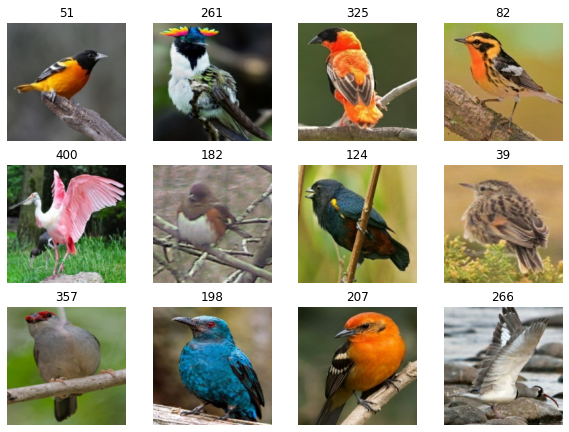

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [17]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Using Image data Augmentation

When we don't have large image datset, we introduce sample diversity by applying random yet realistic transformations to the training images, such as random horizontal flipping or small random rotations. This help to expose the model to different aspects of the training data while slowing down overfitting.

In [18]:
data_augumented = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip('horizontal'),
        layers.experimental.preprocessing.RandomRotation(0.1)
    ]
)

Let's visulalize what the augmented samples look like by applying data_augumented repeatedely to the first image of the dataset:



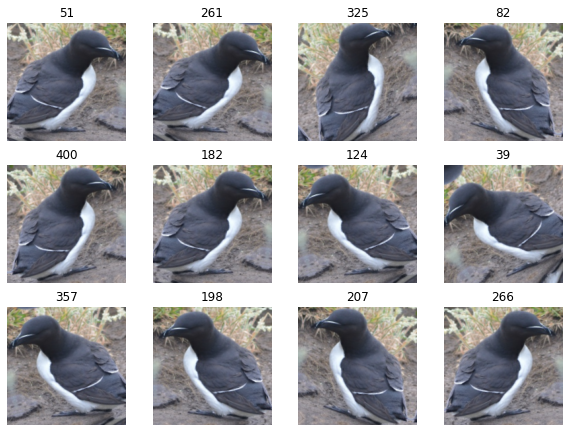

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(12):
        augmented_image = data_augumented(images)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [20]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Standardizing the data

Our images are in a standard size (180*180), as they are being yielded as contiguous float32 batches by our datset. But their RGB channel values are still in the (0 , 255) range. This is not for Neural network. In general, we need to make input values small. we will standardize our input values to be (0,1) by usinf Rescaling layes at the start of model

In [21]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

### Configure the dataset for performance - overlaps data preprocessing and model execution while training.

In [22]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

### Building a Model

In [23]:
class_names = cls

In [24]:
num_classes=len(class_names)
num_classes

450

In [25]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augumented(x, training=True), y))

tf.keras.layers.Conv2D - 2D convolution layer (e.g. spatial convolution over images). Inherits From: Layer, Module

tf.keras.layers.MaxPool2D - Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

tf.keras.layers.Dense - Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.

In [26]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [27]:
model= Sequential([
    data_augumented,
    tf.keras.layers.Rescaling(1./255),
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    
    tf.keras.layers.Dense(3,activation='softmax')
])

In [28]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()

In [29]:
learning_rate = 0.001
epochs=10

opt= tf.keras.optimizers.Adam(learning_rate=learning_rate , decay=learning_rate/(epochs*0.5))

model.compile(loss=loss_fn,optimizer=opt,metrics=['accuracy'])

In [30]:
# model.fit(x=train_ds, epochs = epochs, validation_data = val_ds,verbose = 2)

In [31]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
